# Ejercicio 1

## Item A

Vamos a crear un algoritmo que sea un Generador Congruencial Lineal (GCL). El codigo utilizado es el siguiente

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SEMILLA = (99730+100866+96786+93762)//4

def GCL(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append((resultados[i]*multiplicador + incremento) % modulo)   
    resultados.pop(0)
    return resultados

Importamos la libreria necesaria y utilizamos la semilla que es el promedio de nuestro padrones. El resultado de los 10 primeros numeros son:

In [3]:
resultado = GCL(10,SEMILLA,1664525, 2**32, 1013904223)
for n in range(10):
    print('El numero '+str(n+1)+' es: '+ str(resultado[n]))

El numero 1 es: 614953939
El numero 2 es: 3319310938
El numero 3 es: 1608518515
El numero 4 es: 512085690
El numero 5 es: 3269962515
El numero 6 es: 832498458
El numero 7 es: 1617449651
El numero 8 es: 1245314938
El numero 9 es: 4153147987
El numero 10 es: 921504730


## Item B

El algoritmo utilizado es similar al anterior, la diferencia es que vamos a utilizar el modulo del algoritmo para obtener un rango de numeros generados al azar acotado entre 0 y 1

In [4]:
def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

Mostramos tambien los primeros 10 numeros generados con esta modificacion.

In [5]:
resultado = GCL_con_rango(10,SEMILLA,1664525, 2**32, 1013904223)
for n in range(10):
    print('El numero '+str(n+1)+' es: '+ str(resultado[n]))

El numero 1 es: 0.14318012143485248
El numero 2 es: 0.7728373021818697
El numero 3 es: 0.37451240117661655
El numero 4 es: 0.11922924080863595
El numero 5 es: 0.7613474770914763
El numero 6 es: 0.19383115181699395
El numero 7 es: 0.3765918433200568
El numero 8 es: 0.28994747856631875
El numero 9 es: 0.966980119002983
El numero 10 es: 0.21455453941598535


## Item C

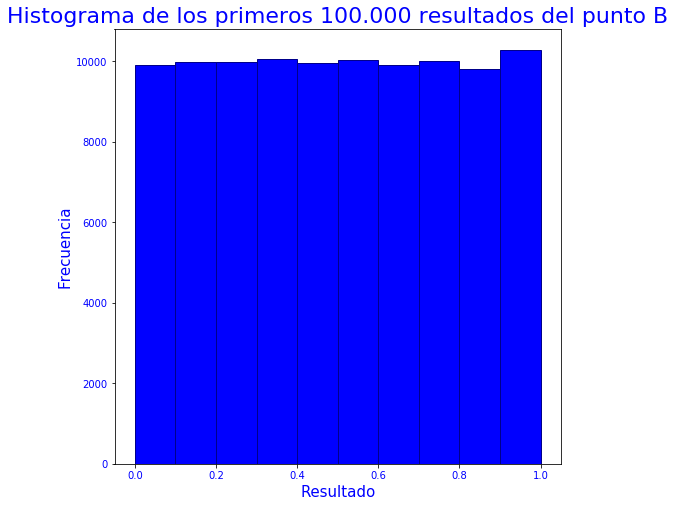

In [6]:
plt.rcParams["figure.figsize"] = (8,8)
plt.hist(GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223), histtype='bar',
         edgecolor='darkblue',color='blue')
title_obj = plt.title('Histograma de los primeros 100.000 resultados del punto B')                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('Resultado', fontsize=15).set_color("blue")
plt.ylabel('Frecuencia', fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.show()

Podemos observar que el algoritmo utilizado tiene una ditribucion similar a una uniforme por lo que consideramos que el GCL con los parametros dados genera numeros pseudoaleatorios bien distribuidos.

# Ejercicio 2

## Item A

El espacio muestral son todos los valores que puede tomar la variable aleatoria. En nuestro caso esta variable seria la suma del resultado de los dos dados, entonces nuestro espacio muestral sera: 
S={2,3,4,5,6,7,8,9,10,11,12}

## Item B

Utilizando las funciones del ejercicio 1, creamos una nueva funcion para simular la tirada de dos dados, recordamos:

In [7]:
SEMILLA = (99730+100866+96786+93762)//4

def GCL(n,Xo,incremento, modulo, multiplicador):
    resultados = [Xo]
    for i in range(n):
        resultados.append((resultados[i]*multiplicador + incremento) % modulo)
    resultados.pop(0)
    return resultados

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    resultados = GCL(n,Xo,incremento,modulo,multiplicador);
    for i in range(n):
        resultados[i] = resultados[i]/modulo
    return resultados

Ahora, vamos a definir una funcion que asigne con igual probabilidad a un resultado del dado, como la distribucion es cuasi-uniforme asignamos un intervalo de igual tamaño, de este modo nos aseguramos que cada resultado sea equiprobable y que el dado sea justo.

In [8]:
def simular_dado(Xo):
    if ( 0<Xo<=1/6 ):
        return 1
    elif ( 1/6<Xo<=2/6 ):
        return 2
    elif ( 2/6<Xo<=3/6 ):
        return 3
    elif ( 3/6<Xo<=4/6 ):
        return 4
    elif ( 4/6<Xo<=5/6 ):
        return 5
    else:
        return 6
    


def simular_tiradas(n):
    tiradas = GCL_con_rango(n,SEMILLA,1664525, 2**32, 1013904223)
    dados = []
    for i in range(0,n,2):
        dados.append((simular_dado(tiradas[i]),simular_dado(tiradas[i+1])))
    return dados

Con las funciones definidas, simulamos las tiradas:

In [9]:
tiradas = simular_tiradas(20000)

Imprimimos los primeros 10 pares:

In [10]:
for n in range(10):
    print('El par generado numero '+str(n+1)+' es: '+ str(tiradas[n]))

El par generado numero 1 es: (1, 5)
El par generado numero 2 es: (3, 1)
El par generado numero 3 es: (5, 2)
El par generado numero 4 es: (3, 2)
El par generado numero 5 es: (6, 2)
El par generado numero 6 es: (4, 4)
El par generado numero 7 es: (2, 4)
El par generado numero 8 es: (2, 4)
El par generado numero 9 es: (4, 2)
El par generado numero 10 es: (4, 5)


## Item C

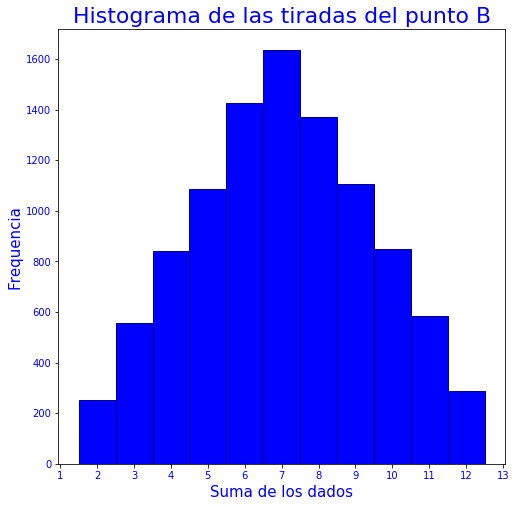

In [11]:
tiradas = simular_tiradas(20000)
sumas = [tirada[0] + tirada[1] for tirada in tiradas]
ticksx = list(range(14))
title_obj = plt.title("Histograma de las tiradas del punto B")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('Suma de los dados', fontsize=15).set_color("blue")
plt.ylabel('Frequencia', fontsize=15).set_color("blue")
plt.xticks(ticksx, color="blue")
plt.yticks(color="blue")
bins = np.arange(1.5,13.5,1)
plt.hist(sumas, bins=bins,histtype='bar', edgecolor='darkblue',color='blue');

Como conclusion, podemos ver que el histograma obtenido es de dados equiprobables ya que los numeros de los extremos tienen menor cantidad de combinacioes para obtenerlos por lo que su probabilidad de aparicion es menor, entonces la cantidad de veces que salga tambien sera menor.

# Ejercicio 3

## Item A

Comenzamos importando las librerias necesarias y definiendo la funcion que vamos a graficar.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Se define la función que recibe un parámetro x y devuelve:
$$
    f_X(x) = \begin{cases}
                \frac{13}{12\pi} - \frac{x^2}{\pi^3},\quad -\frac{\pi}{2} \leq x \leq \frac{\pi}{2} \\
                0, \quad \text{otro caso }\\
            \end{cases}
$$

In [13]:
def f(x):
    if (x < (-np.pi / 2)) or (x > np.pi/2):
        return 0.
    else:
        return (13/(12*np.pi) - (1/(np.pi**3)) * x**2)

f = np.vectorize(f)

El grafico de la funcion densidad es el siguiente:

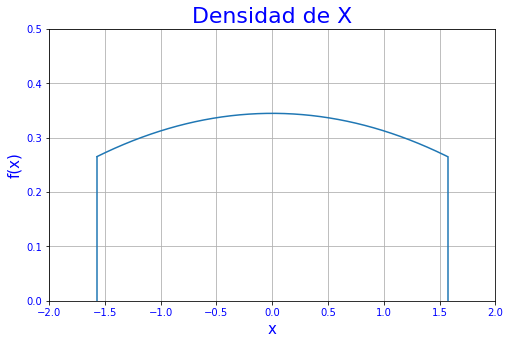

In [14]:
plt.rcParams["figure.figsize"] = (8,8)
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x))

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5)
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5)

plt.axis([-2,2,0,0.5])
title_obj = plt.title("Densidad de X")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel('x', fontsize=15).set_color("blue")
plt.ylabel('f(x)', fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")


plt.grid(True)

## Item B

La funcion de densidad de probabilidad es:
<br>
$$
    f_X(x) = \begin{cases}
                \frac{13}{12\pi} - \frac{x^2}{\pi^3},\quad -\frac{\pi}{2} \leq x \leq \frac{\pi}{2} \\
                0, \quad \text{otro caso }\\
            \end{cases}
$$
<br>
integramos la funcion para encontrar la funcion de probabilidad acumulada y luego su inversa:
<br><br>
$$
    F_X(x) = \int_{-\infty}^{x}f_X(t) dt = \int_{-\frac{\pi}{2}}^{x} \frac{13}{12\pi} - \frac{t^2}{\pi^3} dt\\
$$
<br>
$$
    \implies F_X(x) =  \frac{13 t}{12\pi} - \frac{t^3}{3\pi^3} \big|_{\frac{-\pi}{2}}^x \\
$$
<br>
$$
     \implies F_X(x) = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{13}{24} - \frac{1}{24} = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{1}{2} 
$$
<br>
La función de distribución es un polinomio de grado 3. Su inversa es muy difícil de obtener analíticamente. Por lo tanto, intentarmos aproximarla numéricamente, ya que con eso alcanzará para cumplir con el objetivo del ejercicio de generar la distribución.


In [15]:
def F(x):
    if (x < -np.pi/2):
        return 0.
    if (x > np.pi/2):
        return 1.
    return (13*x / (12*np.pi)) - (x**3)/(3*np.pi**3) + 1/2

F = np.vectorize(F)

dt=0.01
rango_muestras = np.arange(-np.pi/2,np.pi,dt)
muestras = F(rango_muestras)

Ahora para la inversa se invierte el rol de los ejes: el eje X en la distribución pasa a ser el eje Y de la inversa y viceversa. 
Luego, para calcular la inversa en un determinado punto u, se interpolan las muestras tomadas entre $t_1$ y $t_2$, siendo $F_X(t_1) < u $ y $F_X(t_2) >= u$, de modo que 
<br><br>
$$
\hat{F_X^{-1}}(u) = t_1 + dt  \frac{u - F_X(t_1)}{F_X(t_2) - F_X(t_1)}
$$

In [16]:
def Finv(u):
    t = -np.pi/2
    i=1
    m = muestras[1]
    m_ant = muestras[0]
    while (m < u):
        t+=dt
        m_ant = m
        i+=1
        m = muestras[i]
        
    inv = (t-dt) + dt*(u-m_ant)/(m - m_ant)
    return inv

Finv = np.vectorize(Finv)

Graficamos la funcion de probabilidad acumulada:

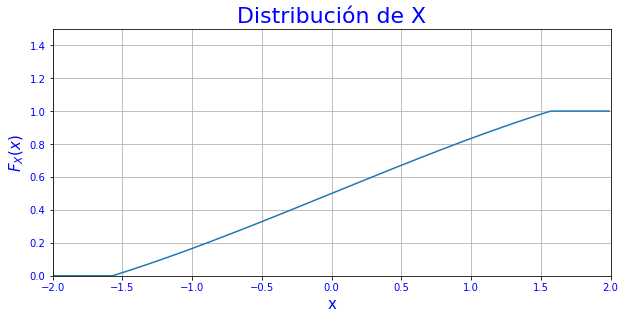

In [17]:
plt.figure(figsize=[10,10])
x = np.arange(-2,2,dt)

plt.subplot(211)
plt.plot(x,F(x))
plt.axis([-2,2,0,1.5])
title_obj = plt.title("Distribución de X")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("$F_X(x)$", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")

plt.grid(True)

Graficamos la inversa de la funcion de probabilidad acumulada:

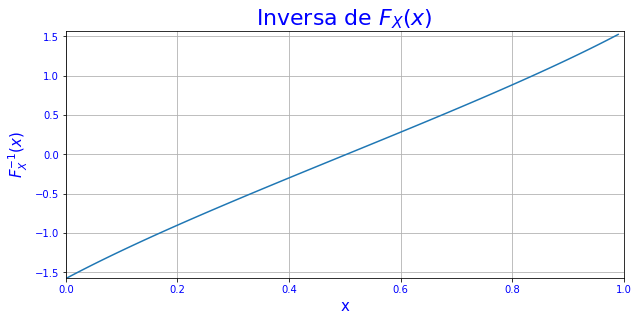

In [18]:
plt.figure(figsize=[10,10])
u = np.arange(0,1,0.01)
plt.subplot(212)
plt.plot(u,Finv(u))
plt.axis([0,1,-np.pi/2,np.pi/2])

title_obj = plt.title("Inversa de $F_X(x)$")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("$F_X^{-1}(x)$", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")


plt.grid(True)

## Item C

Generamos 10^5 muestras de U uniforme entre 0 y 1, utilizando el generador aleatorio del ejercicio 1.
Por el método de transformación inversa sabemos que, con U uniforme entre 0 y 1,
$$
    F_X^{-1}(U) \sim X
$$
Por esta razón, calculamos la distribución inversa de X para los valores generados por el generador pseudo aleatorio, esperando conseguir la distribución propuesta.

In [19]:
N = int(1e5)
U = GCL_con_rango(N,SEMILLA,1664525, 2**32, 1013904223)
Xgen = Finv(U)

## Item D

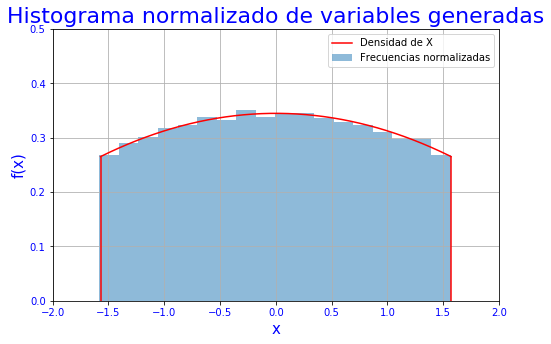

In [20]:
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x),'r',label="Densidad de X")

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5,c='r')
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5,c='r')

plt.axis([-2,2,0,0.5])

title_obj = plt.title("Histograma normalizado de variables generadas")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("f(x)", fontsize=15).set_color("blue")
plt.xticks(color="blue")
plt.yticks(color="blue")

plt.grid(True)
hist = plt.hist(Xgen,density=True,bins='sturges',alpha=0.5,label="Frecuencias normalizadas")

plt.legend()


plt.show()

Podemos ver que la curva teórica de la densidad propuesta ajusta muy bien a las muestras generadas. Con esto podemos confirmar que el cálculo de la inversa mediante interpolación fue correcto.

# Ejercicio 4

## Item A , B y C

En primer lugar importamos las funciones necesarias y realizamos un gráfico de como es la función de densidad de la variable que queremos generar.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

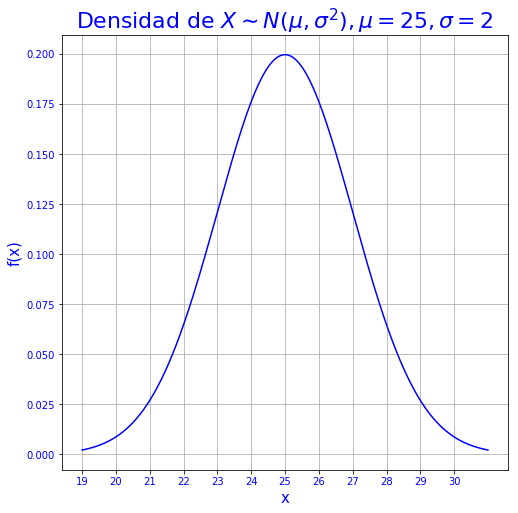

In [22]:
mu = 25
sigma = 2
x = np.arange(mu-3*sigma,mu+3*sigma,0.001)
xticks = np.arange(19,31,1)
normal = norm(mu,sigma)
plot = plt.plot(x,normal.pdf(x), color = 'blue')
title_obj = plt.title("Densidad de $X\sim N(\mu,\sigma^2), \mu=25,\sigma=2$")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xlabel("x", fontsize=15).set_color("blue")
plt.ylabel("f(x)", fontsize=15).set_color("blue")
plt.xticks(xticks, color="blue")
plt.yticks(color="blue")

plt.grid(True)

Considerando que para una distribución normal aproximadamente el 99.7% de la probabilidad se concentra en el intervalo $[\mu-3\sigma,\mu+3\sigma]$, supondremos para nuestro algoritmo que la variable aleatoria está restringida a ese intervalo ([19,31] con los datos del enunciado).
Al poder acotar los valores del dominio de la gaussiana y al conocer el valor máximo de su densidad, podemos implementar el generador.

Implementamos el generador de la variable normal mediante el método de aceptación y rechazo.

In [23]:
def aceptacionRechazo(n):
    gen = np.zeros(n)
    for i in range(0,n):
        accept = False
        while not accept:
            U1 = np.random.rand()*6*sigma + mu - 3*sigma
            U2 = np.random.rand()*maximo
            if (U2 < normal.pdf(U1)):
                gen[i] = U1
                accept = True
    return gen

In [24]:
maximo = normal.pdf(mu)
N = int(1e5)
generados = aceptacionRechazo(N)

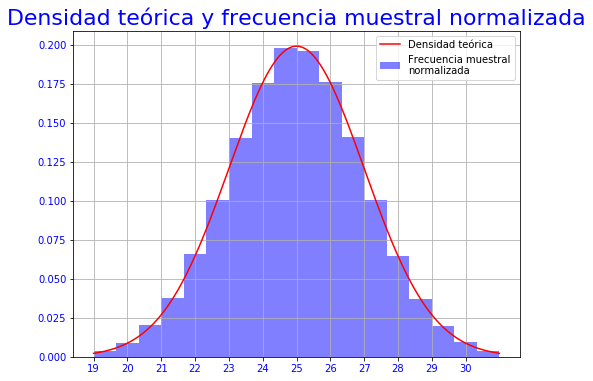

In [26]:
plt.figure(figsize=[8,6])
x = np.arange(mu-3*sigma,mu+3*sigma,0.001)
xticks = np.arange(19,31,1)
normal = norm(mu,sigma)
plot = plt.plot(x,normal.pdf(x),c='r',label="Densidad teórica")
plt.xticks(xticks)
plt.hist(generados,density=True,bins='sturges',color='b',alpha=0.5,
         label="Frecuencia muestral\nnormalizada")

title_obj = plt.title("Densidad teórica y frecuencia muestral normalizada")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xticks(xticks, color="blue")
plt.yticks(color="blue")


plt.legend(loc='best')
plt.grid(True)
plt.show()

## Item D

Realizamos las comparaciones pedidas

In [27]:
media_muestral = sum(generados)/N
varianza_muestral = sum((generados - media_muestral)**2) / N

print("Media muestral: %5.5f."%media_muestral)
print("Varianza muestral: %5.5f"%varianza_muestral)

Media muestral: 24.99854.
Varianza muestral: 3.88203


In [28]:
Er_media = abs(media_muestral - mu) / mu
Er_var = abs(varianza_muestral - sigma**2) / sigma**2
print("Error relativo en la media muestral: %5.5f."%Er_media)
print("Error relativo en la varianza muestral: %5.5f"%Er_var)

Error relativo en la media muestral: 0.00006.
Error relativo en la varianza muestral: 0.02949


# Ejercicio 5

Utilizamos la funcion GCL_con_rango(n,Xo,incremento, modulo, multiplicador) definida en el ejercicio 1 e importamos las librerias necesarias

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chisquare

In [30]:
SEMILLA = ((99730+100866+96786+93762)//4)
def obtener_tam_gap_test(muestra):
    '''Dada una muestra de numeros aleatorios cuenta cuantos nuemeros seguidos
    pertenecen al intervalo [0.2;0.5] y devuelve un arreglo'''
    repeticiones = 0
    frequencias = []
    for n in range(len(muestra)):
        if (0.2 <= muestra[n] <= 0.5 and repeticiones>=0):
            frequencias.append(repeticiones)
            repeticiones = 0
            continue
        repeticiones+=1
    if (repeticiones>0):
        frequencias.append(repeticiones)
    return frequencias

In [31]:
def obtener_frec_tam_gap_observadas(freq_gap_test):
    '''Dada una lista cuenta la cantidad de elementos repetidos en un diccionario'''
    frequencias = {i:freq_gap_test.count(i) for i in freq_gap_test}
    return frequencias

In [32]:
muestra = GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223)

In [33]:
def prob_geom(x):
    '''Funcion geometrica para obtener las probabilidades esperadas'''
    p = 0.3
    q = ((1-p)**(x-1))*p
    return q

Buscamos el estadistico con la formula vista en la practica

In [34]:
def chisquare_test_geom(frecuencias_obs): 
    estadistico = 0
    n = sum(list(frecuencias_obs.values()))
    for tam in frecuencias_obs:
        p = prob_geom(tam)
        estadistico += ((frecuencias_obs.get(tam)-n*p)**2) / (n*p)
    return estadistico

Contamos los gaps y la cantidad de veces que halla aparecido un gap de tamaño n.

In [35]:
tam_gap_test = obtener_tam_gap_test(muestra)
print(tam_gap_test[0:5])

frequencias_tam_gap_observadas = obtener_frec_tam_gap_observadas(tam_gap_test)
print(frequencias_tam_gap_observadas)

[2, 3, 0, 1, 4]
{2: 4384, 3: 3065, 0: 8963, 1: 6444, 4: 2101, 16: 26, 5: 1515, 11: 180, 7: 721, 9: 356, 13: 91, 6: 1061, 8: 526, 10: 280, 15: 39, 12: 136, 14: 57, 17: 29, 19: 13, 18: 12, 20: 7, 24: 1, 27: 2, 23: 1, 21: 2, 22: 2, 38: 1, 32: 1, 25: 1}


In [36]:
names = ['tam_gap','cant_repeticiones']
formats = ['i8','i8']
dtype = dict(names = names, formats=formats)
frequencias = np.array(list(frequencias_tam_gap_observadas.items()), dtype=dtype)
print(frequencias)
print(repr(frequencias))

[( 2, 4384) ( 3, 3065) ( 0, 8963) ( 1, 6444) ( 4, 2101) (16,   26)
 ( 5, 1515) (11,  180) ( 7,  721) ( 9,  356) (13,   91) ( 6, 1061)
 ( 8,  526) (10,  280) (15,   39) (12,  136) (14,   57) (17,   29)
 (19,   13) (18,   12) (20,    7) (24,    1) (27,    2) (23,    1)
 (21,    2) (22,    2) (38,    1) (32,    1) (25,    1)]
array([( 2, 4384), ( 3, 3065), ( 0, 8963), ( 1, 6444), ( 4, 2101),
       (16,   26), ( 5, 1515), (11,  180), ( 7,  721), ( 9,  356),
       (13,   91), ( 6, 1061), ( 8,  526), (10,  280), (15,   39),
       (12,  136), (14,   57), (17,   29), (19,   13), (18,   12),
       (20,    7), (24,    1), (27,    2), (23,    1), (21,    2),
       (22,    2), (38,    1), (32,    1), (25,    1)],
      dtype=[('tam_gap', '<i8'), ('cant_repeticiones', '<i8')])


# Test estadistico

Aplicar un gap test al generador congruencial lineal implementado en el ejercicio 1 utilizando el intervalo [0,2 - 0,5].
Analizar el resultado obtenido, e indicar si la distribución de probabilidades pasa o no el test.
Considerar un nivel de significación del 1%.

Buscamos el estadistico

In [37]:
estadistico = chisquare_test_geom(frequencias_tam_gap_observadas)
estadistico

3937.685890226105

In [38]:
frecuencias_observadas = list(frequencias_tam_gap_observadas.values())
print(frecuencias_observadas)

frecuencias_esperadas = []
for i in range(len(frecuencias_observadas)):
    frecuencias_esperadas.append(round(prob_geom(i) * sum(frecuencias_observadas), 0))

print(frecuencias_esperadas)

[4384, 3065, 8963, 6444, 2101, 26, 1515, 180, 721, 356, 91, 1061, 526, 280, 39, 136, 57, 29, 13, 12, 7, 1, 2, 1, 2, 2, 1, 1, 1]
[12864.0, 9005.0, 6304.0, 4412.0, 3089.0, 2162.0, 1513.0, 1059.0, 742.0, 519.0, 363.0, 254.0, 178.0, 125.0, 87.0, 61.0, 43.0, 30.0, 21.0, 15.0, 10.0, 7.0, 5.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]


In [39]:
chisquare(f_obs = frecuencias_observadas, f_exp = frecuencias_esperadas)

Power_divergenceResult(statistic=18550.766078353827, pvalue=0.0)

Dado que el estadistico calculado D2 > estadistico teorico Dalfa

D2 = 3937.68589

dalfa = 3873.3180925

### Rechazamos el test.

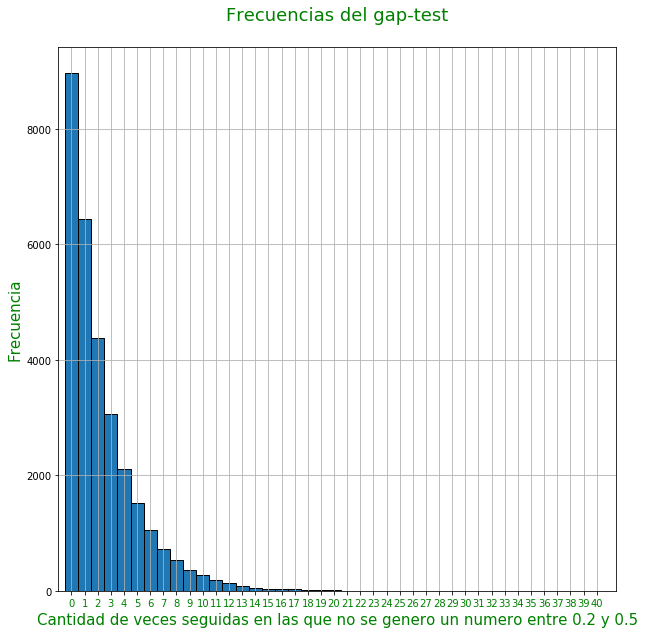

In [40]:
ticksx = list(range(41))
plt.rcParams["figure.figsize"] = (10,10)
bins = np.arange(-0.5,40.5,1)
plt.hist(tam_gap_test, edgecolor='k', bins=bins)
plt.xlim(left=-1)
plt.xticks(ticksx, color="green")
plt.title('Frecuencias del gap-test\n', fontsize=18).set_color("green")
plt.xlabel('Cantidad de veces seguidas en las que no se genero un numero entre 0.2 y 0.5', fontsize=15).set_color("green")
plt.ylabel('Frecuencia', fontsize=15).set_color("green")
plt.grid();

# Ejercicio 6

Utilizamos las funciones definidas en el ejercicio 2

In [41]:
from scipy.stats import chi2,chisquare
import random

In [42]:
def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

def simular_dado(Xo):
    resultado_dado=GCL_con_rango(10,Xo,1664525, 2**32, 1013904223)[0]
    if ( 0<resultado_dado<=1/6 ):
        resultado_dado=1
    elif ( 1/6<resultado_dado<=2/6 ):
        resultado_dado=2
    elif ( 2/6<resultado_dado<=3/6 ):
        resultado_dado=3
    elif ( 3/6<resultado_dado<=4/6 ):
        resultado_dado=4
    elif ( 4/6<resultado_dado<=5/6 ):
        resultado_dado=5
    else:
        resultado_dado=6
    return resultado_dado


def simular_dados(n):
    tiradas=[]
    for i in range(1,n+1):
        tiradas.append((simular_dado(int(random.randrange(1000))),simular_dado(int(random.randrange(1000)))))
    return tiradas

Con el generador de numeros pseudo aleatorios del punto 2, generamos 10^5 tiradas de 2 dados. Luego, a cada tirada le calculamos el resultado como la suma de ambos dados. A partir de ese cálculo, generamos un histograma que muestre las ocurrencias de cada resultado posible.

In [43]:
N = int(1e5)
tiradas = list(map(lambda x: x[0]+x[1], simular_dados(N)))

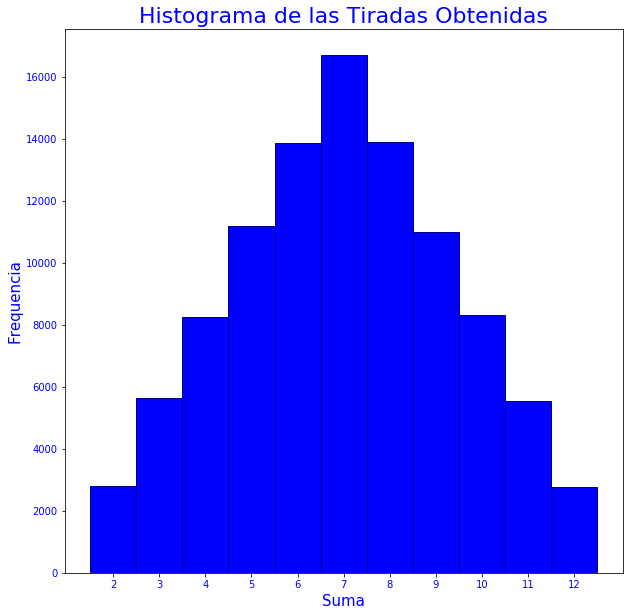

In [44]:
bins = np.arange(1.5,13.5,1)
hist = plt.hist(tiradas,bins=bins,histtype='bar', edgecolor='darkblue',color='blue')
title_obj = plt.title("Histograma de las Tiradas Obtenidas")                
plt.getp(title_obj, 'text')            
plt.setp(title_obj, color='blue', size=22)
plt.xticks(np.arange(2,13,1),color="blue")
plt.yticks(color="blue")
plt.xlabel("Suma", fontsize=15).set_color("blue")
plt.ylabel("Frequencia", fontsize=15).set_color("blue");

Las frecuencias normalizadas que se desearían para cada posible valor de una tirada están la siguiente tabla

<img src="./dados.jpg" style="width:500px"/>

Se tiene la fórmula para el estadístico $D^2$ test de Chi cuadrado:

$$
    D^2 = \sum_{s=1}^k \frac{ (Y_s - n p_s )^2}{n p_s} \\
    Y_s :\text{Frecuencia observada}, \quad n p_s: \text{ Frecuencia esperada }, \quad k: \text{clases,buckets,etc}
$$

y nos plantean tomar un nivel de significación de 1% es decir, $\alpha = 0.01$

Si el estadístico es mayor tiene un valor-P asociado mayor a $\alpha$ o de forma equivalente, que sea $D^2 < D_{\alpha}$, la ddistribución será aceptada.
$$
$$

No es necesario implementar el cálculo del estadístico, el mismo ya esta implementado en la libreria scipy.stats

Para poder realizar el test, definimos la frecuencia de cada resultado que esperaríamos obtener en la distribución contra la que estamos evaluando.

In [45]:
f_teo = np.array([1,2,3,4,5,6,5,4,3,2,1])/36 * len(tiradas)

Las frecuencias observadas son las que usamos para construir el histograma anterior.

In [46]:
f_obs = hist[0]

Utilizando las frecuencias observadas y esperadas ejecutamos el test de Chi cuadrado, que obtiene el estadístico y su correspondiente valor P.

In [47]:
chi_test = chisquare(f_obs,f_teo)

In [48]:
msj = "El test de Chi^2 devolvio un estadístico D = {0}, correspondiente al valor p = {1}"\
    .format(chi_test[0] , chi_test[1])
print(msj)

El test de Chi^2 devolvio un estadístico D = 4.701949999999982, correspondiente al valor p = 0.9101784902570259


El test de $\chi^2$ nos devolvió un estadístico $D^2$ cuyo valor P asociado es mayor que el nivel de significación elegido ($\alpha = 0.01$). Por lo tanto, la distribución es aceptada. Para cambiar el resultado del test de hipótesis deberíamos tomar cualquier nivel de significación mayor al valor P obtenido ($\alpha\in(pValue,1)$)
$$
$$

# Ejercicio 7

Recordamos que en el ejercicio 4, mediante el método de aceptación y rechazo, implementamos un generador de números aleatorios con distribución normal con media $\mu = 25$ y desvío estándar $\sigma = 2$. Utilizamos nuevamente ese generador para obtener 100.000 muestras.
$$
$$

In [49]:
def aceptacionRechazo(n):
    gen = np.zeros(n)
    for i in range(0,n):
        accept = False
        while not accept:
            U1 = np.random.rand()*6*sigma + mu - 3*sigma
            U2 = np.random.rand()*maximo
            if (U2 < normal.pdf(U1)):
                gen[i] = U1
                accept = True
    return gen

In [50]:
N = int(1e5)
generados = aceptacionRechazo(N)
ordenados = np.sort(generados)

A las muestras obtenidas, les aplicamos el Test de Kolmogorov-Smirnov contra la distribución teórica.
Calculamos q tal que:
<br><br>
$$
    q = \max_x |\hat{F}_X(x) - F_X(x)|
$$

In [51]:
q = 0
i = 0
while i < N:
    x = ordenados[i]
    if abs(i/N - normal.cdf(x)) > q:
        max_x = x
        q = abs(i/N - normal.cdf(x))
    i+=1

In [52]:
print('q es: '+ str(q))

q es: 0.0024956343907278633


Nos proponen un nivel de significación $\alpha = 0.01$. Aceptaremos la distribución si:
<br><br>
$$
    q \gt \sqrt{\frac{-1}{2N}\ln{\frac{\alpha}{2}}} = \text{umbral}
$$

In [53]:
alpha = 0.01
umbral = np.sqrt(-1/(2*N) * np.log(alpha/2))
print('El umbral es: ' +str(umbral))

El umbral es: 0.005146997846583986


Finalmente

In [54]:
if q > umbral:
    print("La distribución es aceptada por el test")
else:
    print("La distribución es rechazada por el test")

La distribución es rechazada por el test


# Ejercicio 8

Vamos a simular el movimiento de una particula considerando las indicaciones dadas, para ello comenzamos definiendo la clase que va a dibujar este evento.

In [55]:
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation, PillowWriter

In [56]:
class DrawSimulation():
    '''Clase para dibujar el movimiento de la Particula'''
    def __init__(self, puntosr, puntosg, ancho, alto, t, duracion, largo_pared):
        self.fig, self.ax = plt.subplots()

        self.ln1 = self.ax.scatter([], [], c='g', s=1)
        self.ln2 = self.ax.scatter([], [], c='r', s=1)
        self.square, = self.ax.plot([], [])
        self.wall, = self.ax.plot([], [])

        plt.axis('off')
        self.alto = alto
        self.largo_pared = largo_pared
        self.ancho = ancho
        self.t = t
        self.puntosr = puntosr
        self.puntosg = puntosg
        self.duracion = duracion #en segundos
        self.fps = min(max(1, t//duracion), 30)

    def draw(self,fname="ejemplo.gif"):
        ani = FuncAnimation(self.fig, self.update, [i for i in range(self.t)], init_func=self.init)
        writer = PillowWriter(fps = self.fps)
        ani.save(fname, writer = writer)
        #os.system(f"start {fname}s")
        os.system(f"eog {fname}&")

    def init(self):
        self.ax.set_xlim(-self.ancho-1,self.ancho+1)
        self.ax.set_ylim(-self.alto-1, self.alto+1)

    def update(self, i):
        self.square.set_data([-self.ancho,self.ancho,self.ancho,-self.ancho,-self.ancho], [-self.alto,-self.alto,self.alto,self.alto,-self.alto])
        self.wall.set_data([0,0],[-self.alto, self.largo_pared])
        if len(self.puntosr)>i:
            self.ln1.set_offsets(self.puntosr[i])
        if len(self.puntosg)>i:
            self.ln2.set_offsets(self.puntosg[i])

Ahora pasamos a definir el script que simulara el evento de como se mueve la particula

In [57]:
cantidad_molec = 1
alto = 10
ancho = 5
n_steps=1000
wall_length=-alto
vel = .1

def moleculas(ancho,alto,n_steps,vel):
    l = []
    particulas = np.array([[0,0]])
    for i in range(n_steps):
        r = np.random.randint(0, 2, (1, 1))
        move = np.concatenate([r,abs(r-1)],-1)*(np.random.randint(0,2,(1,1))*2-1)*vel
        particulas = particulas+move
        l.append(particulas.reshape(1,-1,2))
    return l

l1 = moleculas(ancho,alto,n_steps,vel)

l1 = np.concatenate(l1,axis=0)
#DrawSimulation(l1, [], ancho, alto, n_steps, 4, -alto).draw("one-particle.gif") Ver gif en Anexos

# Ejercicio 9

En este caso la cantidad de particulas aumenta, para simular este evento utilizaremos un codigo muy similar al anterior haciendo difenrencia en el numero de particulas.

Comenzamos con la simulacion sin pared:

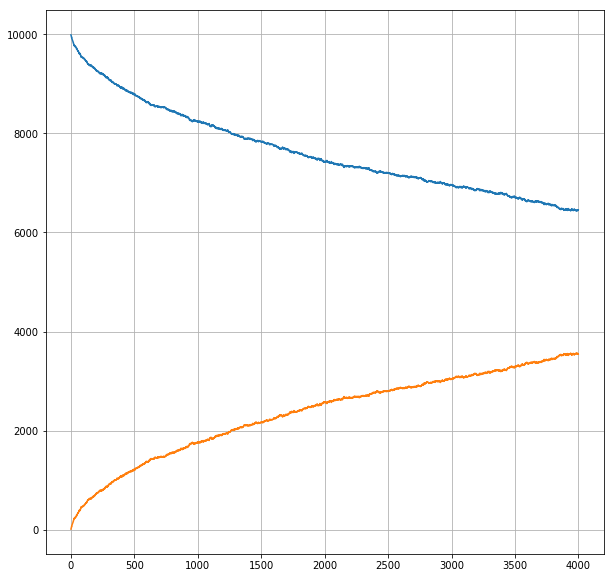

In [58]:
import numpy as np
cantidad_molec = 10000
alto = 10 #Aclaracion: El alto y ancho van de -x a x. Ej: -10 a 10.
ancho = 5
n_steps=4000
wall_length=-alto
vel = .1

def moleculas(ancho,alto,cantidad_molec,n_steps,wall_length,vel,der=True):
    # Vamos a limtar las posiciones iniciales a posiciones con 1 solo digito decimal.
    # Con esto podemos agregar una performance significativa en el calculo de colisiones en las paredes.
    stats = []
    l = []
    aa = np.random.random((cantidad_molec, 1)) * (ancho - .21) +.1
    bb = np.random.random((cantidad_molec, 1)) * (2 * (alto-.2)) - (alto-.2)
    particulas = [aa*(2*der-1), bb]
    particulas = np.concatenate(particulas,-1)
    #veo que no haya nada sobre la pared
    assert(((particulas[:,0]<0.1)*(particulas[:,0]>-0.1)*(particulas[:,1]<=wall_length)).sum()==0)
    for i in range(n_steps):
        r = np.random.randint(0, 2, (cantidad_molec, 1))
        move = np.concatenate([r,abs(r-1)],-1)*(np.random.randint(0,2,(cantidad_molec,1))*2-1)*vel

        #Predigo el siguiente movimiento
        tmp = particulas+move
        #Veo si estoy sobre la pared
        colision_recipiente = (tmp[:,0]<0.1)*(tmp[:,0]>-0.1)*(tmp[:,1]<=wall_length)
        #ancho
        colision_recipiente = colision_recipiente | (tmp[:, 0] >= ancho) | (tmp[:, 0] <= -ancho)
        #alto
        colision_recipiente = colision_recipiente | (tmp[:, 1] >= alto) | (tmp[:, 1] <= -alto)
        tmp = particulas + move * (1-colision_recipiente)[:, None]
        # CHECK FOR WALL
        assert(((tmp[:,0]<0.1)*(tmp[:,0]>-0.1)*(tmp[:,1]<=wall_length)).sum()==0) #Verficamos que nunca una particula este dentro de la pared.
        particulas = tmp
        #Finalmente esta correcto y actualizamos
        stats.append([(particulas[:,0]>0).sum(),(particulas[:,0]<=0).sum()] )
        l.append(particulas.reshape(1,-1,2))
    return l,stats

#Simulo las particulas de la derecha
l1,s1 = moleculas(ancho,alto,cantidad_molec,n_steps,wall_length,vel)
#Simulo las particulas de la izquierda
l2,s2 = moleculas(ancho,alto,cantidad_molec,n_steps,wall_length,vel,der=False)

a0,b0 = s1[0]
xt,y1,y2=[],[],[]

for i,(a,b) in enumerate(s1[1:]):
    xt.append(i)
    y1.append(a)
    y2.append(b)
    a0 = a
    b0 = b

import matplotlib.pyplot as plt
ax = plt.plot(xt,y1)
ax = plt.plot(xt,y2)
plt.grid()
plt.show()


l1 = np.concatenate(l1, axis=0)
l2 = np.concatenate(l2, axis=0)
#DrawSimulation(l1, [] , ancho, alto, n_steps, 4, wall_length).draw("ej8.gif") Ver gif en Anexos

Como se puede ver las moleculas tienden a estar en equilibrio

Comenzamos con la simulacion con pared:

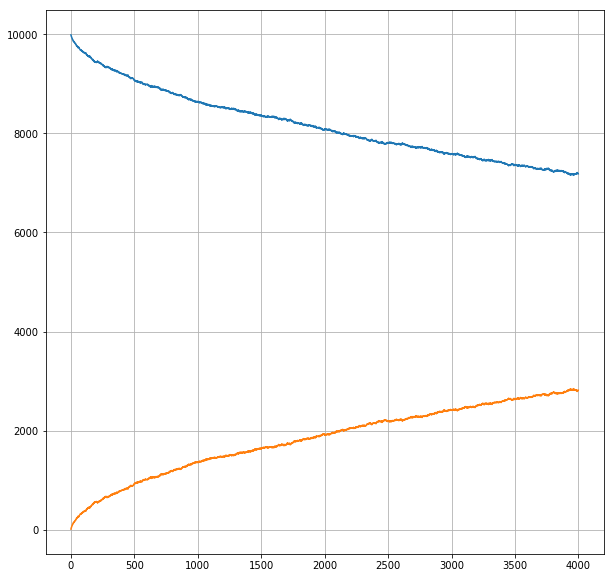

In [59]:
wall_length+=int(alto/2)

#Simulo las particulas de la derecha
l1,s1 = moleculas(ancho,alto,cantidad_molec,n_steps,wall_length,vel)
#Simulo las particulas de la izquierda
l2,s2 = moleculas(ancho,alto,cantidad_molec,n_steps,wall_length,vel,der=False)

a0,b0 = s1[0]
xt,y1,y2=[],[],[]

for i,(a,b) in enumerate(s1[1:]):
    xt.append(i)
    y1.append(a)
    y2.append(b)
    a0 = a
    b0 = b

import matplotlib.pyplot as plt
ax = plt.plot(xt,y1)
ax = plt.plot(xt,y2)
plt.grid()
plt.show()


l1 = np.concatenate(l1, axis=0)
l2 = np.concatenate(l2, axis=0) 
#DrawSimulation(l1, [] , ancho, alto, n_steps, 4, wall_length).draw("ej8.gif") Ver gif en Anexos

En esta caso como esta la pared se llega mas lento al equilibrio porque hay menos intercambio.

# Ejercicio 10

Vamos a hacer la simulacion de 100 personas en un recinto de 100x100 con velocidad 1 y movimiento aleatorio

En este caso todas las personas se estaran moviendo, ademas una persona infectada no se podra curar.

In [60]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
vel = 1
import numpy as np
def inicializar(total,porcentaje_contagios):
    m = np.array([ancho-2,alto-2])
    b = -np.array([(ancho-2)//2,(alto-2)//2])
    enfermos = np.random.random((int(total*porcentaje_contagios),2)) *m+b
    sanos = np.random.random((total-int(total * porcentaje_contagios), 2))*m+b
    return enfermos,sanos

def contagiar(sanos, enfermos):
    # Todos con todos eje x
    x = (sanos[:,0][:, None] - enfermos[:,0]).reshape(-1)
    # Todos con todos eje y
    y = (sanos[:,1][:, None] - enfermos[:,1]).reshape(-1)
    # Distancia
    contagios = (x ** 2 + y ** 2) < DIST_CONTAGIO*DIST_CONTAGIO
    #Probailidad en caso de estar cerca
    contraerla = np.random.random(sanos.shape[0]*enfermos.shape[0])<=.6
    #ESTAS CERCA Y NO TE CUIDASTE
    contagios = contagios & contraerla
    #Si alguno de las personas te contagio entonces contagiado estas!
    return contagios.reshape(-1,enfermos.shape[0]).sum(-1)>0

def mover(vec):
    cantidad = vec.shape[0]
    r = np.random.randint(0, 2, (cantidad, 1))
    move = np.concatenate([r, abs(r - 1)], -1) * (np.random.randint(0, 2, (cantidad, 1)) * 2 - 1) * vel
    # Predigo el siguiente movimiento
    tmp = vec + move
    # ancho
    colision_recipiente = (tmp[:, 0] >= ancho//2) | (tmp[:, 0] <= -ancho//2)
    # alto
    colision_recipiente = colision_recipiente | (tmp[:, 1] >= alto//2) | (tmp[:, 1] <= -alto//2)
    tmp = vec + move * (1 - colision_recipiente)[:, None]
    return tmp

import matplotlib.pyplot as plt
def evolucion_infectados(t,sanos,enfermos,fname):
    fig, ax = plt.subplots()
    ax.plot(t, sanos, c='g')
    ax.plot(t, enfermos, c='r')
    ax.legend(['Sanos', 'Enfermos'])
    ax.set_title("Evolución de infectados")
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Cantidad De Personas")
    plt.savefig("{}.png".format(fname))


#CASO TODOS SE MUEVEN
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)
l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())
evo =[[],[],[]]
while i<n_steps:
    i+=1
    #Calcular contagio
    if sanos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos,sanos[idx]],axis=0)
        sanos = sanos[~idx]
    l1.append(sanos.copy())
    l2.append(enfermos.copy())
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0]!=0:
        sanos = mover(sanos)
    if sanos.shape[0] != 0:
        enfermos = mover(enfermos)


#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidA1.gif")
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionA1") #Ver gif en Anexos

En este caso solo se podran mover las personas que esten sanas. Redefinimos las funciones que requieren un cambio, las otras las reutilizaremos del item previo.

In [61]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
vel = 1

#Sólo se mueven los individuos sanos.
#Una vez que un individuo sano se enferma, se mueve entre 10 y 20 turnos más
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)
l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())
ice = np.zeros(enfermos.shape[0])
evo =[[],[],[]]
while sanos.shape[0]!=0 and i<n_steps:
    ice = np.clip(ice-1,0,20)
    i+=1
    #Calcular contagio
    if sanos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos,sanos[idx]],axis=0)
        ice = np.concatenate([ice,np.random.randint(10, 21, idx.sum())])
        sanos = sanos[~idx]
    l1.append(sanos.copy())
    l2.append(enfermos.copy())

    #data graficos
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0] != 0:
        sanos = mover(sanos)
    if sanos.shape[0] != 0:
        tmp_enfermos = mover(enfermos)
        enfermos[ice!=0] = tmp_enfermos[ice!=0]


#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidA2.gif") #Ver gif en Anexos
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionA2")

Finalmente, para el ultimo caso del modelo A, solo se podran mover el 50% de las personas. Redefinmos la parte de codigo necesaria: 

In [62]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
vel = 1

#Sólo se mueven los individuos sanos.
#Una vez que un individuo sano se enferma, se mueve entre 10 y 20 turnos más
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)

ice = np.array([0 for i in range(poblacion//2)] + [1 for i in range(poblacion-poblacion//2)])
np.random.shuffle(ice)

ice_enfermos = ice[:enfermos.shape[0]]
ice_sanos = ice[enfermos.shape[0]:]

l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())

evo =[[],[],[]]
while i<n_steps:
    i+=1
    #Calcular contagio
    if sanos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos, sanos[idx]], axis=0)
        ice_enfermos = np.concatenate([ice_enfermos, ice_sanos[idx]], axis=0)
        sanos = sanos[~idx]
        ice_sanos = ice_sanos[~idx]

    l1.append(sanos.copy())
    l2.append(enfermos.copy())

    #data graficos
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0] != 0:
        tmp_sanos = mover(sanos)
        sanos[ice_sanos != 0] = tmp_sanos[ice_sanos != 0]
    if sanos.shape[0] != 0:
        tmp_enfermos = mover(enfermos)
        enfermos[ice_enfermos != 0] = tmp_enfermos[ice_enfermos != 0]


#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidA3.gif") #Ver gif en Anexos
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionA3")

## Parte B

En este modelo la gente podra curse aleatoriamente, comenzamos con el caso A

In [63]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
tiempo_enfermas=20
vel = 1

#CASO TODOS SE MUEVEN
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)
l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())
evo =[[],[],[]]
dias_enfermo = np.ones(enfermos.shape[0])*tiempo_enfermas
while i<n_steps:
    dias_enfermo = np.clip(dias_enfermo-1,0,tiempo_enfermas)
    i+=1
    #Intento Sanar
    if enfermos.shape[0]!=0:
        idx = (dias_enfermo==0)&(np.random.random(dias_enfermo.shape[0])<=.8)
        sanos = np.concatenate([sanos, enfermos[idx]], axis=0)
        enfermos = enfermos[~idx]
        dias_enfermo = dias_enfermo[~idx]

    #Calcular contagio
    if sanos.shape[0]!=0 and enfermos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos,sanos[idx]],axis=0)
        dias_enfermo = np.concatenate([dias_enfermo,np.ones(idx.sum()) * tiempo_enfermas],axis=0)
        sanos = sanos[~idx]

    l1.append(sanos.copy())
    l2.append(enfermos.copy())
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0]!=0:
        sanos = mover(sanos)
    if sanos.shape[0] != 0:
        enfermos = mover(enfermos)


#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidB1.gif") #Ver gif en Anexos
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionB1")

Para el caso B, los que se enferman no se mueven y si te enfermaste despues de 10 turnos no te moves

In [64]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
tiempo_enfermas=20
vel = 1

#Sólo se mueven los individuos sanos.
#Una vez que un individuo sano se enferma, se mueve entre 10 y 20 turnos más
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)
l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())
evo =[[],[],[]]
dias_enfermo = np.ones(enfermos.shape[0])*tiempo_enfermas
ice = np.zeros(enfermos.shape[0])
while i<n_steps:
    dias_enfermo = np.clip(dias_enfermo - 1, 0, tiempo_enfermas)
    ice = np.clip(ice - 1, 0, 20)
    i+=1
    #Intento Sanar
    if enfermos.shape[0]!=0:
        idx = (dias_enfermo==0)&(np.random.random(dias_enfermo.shape[0])<=.8)
        sanos = np.concatenate([sanos, enfermos[idx]], axis=0)
        enfermos = enfermos[~idx]
        dias_enfermo = dias_enfermo[~idx]
        ice = ice[~idx]

    #Calcular contagio
    if sanos.shape[0]!=0 and enfermos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos,sanos[idx]],axis=0)
        dias_enfermo = np.concatenate([dias_enfermo,np.ones(idx.sum()) * tiempo_enfermas],axis=0)
        ice = np.concatenate([ice,np.random.randint(10, 21, idx.sum())])
        sanos = sanos[~idx]

    l1.append(sanos.copy())
    l2.append(enfermos.copy())
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0]!=0:
        sanos = mover(sanos)
    if sanos.shape[0] != 0:
        tmp_enfermos = mover(enfermos)
        enfermos[ice != 0] = tmp_enfermos[ice != 0]


#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidB2.gif") #Ver gif en Anexos
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionB2")

En este ultimo caso se movera al azar la mitad de la gente

In [65]:
poblacion = 100
alto = 100
ancho = 100
porcentaje_contagios = .05
n_steps = 4000
DIST_CONTAGIO=2
tiempo_enfermas=20
vel = 1

#Sólo se mueven los individuos sanos.
#Una vez que un individuo sano se enferma, se mueve entre 10 y 20 turnos más
enfermos,sanos = inicializar(poblacion, porcentaje_contagios)


ice = np.array([0 for i in range(poblacion//2)] + [1 for i in range(poblacion-poblacion//2)])
np.random.shuffle(ice)

ice_enfermos = ice[:enfermos.shape[0]]
ice_sanos = ice[enfermos.shape[0]:]


l1,l2 = [],[]
i = 0
l1.append(sanos.copy())
l2.append(enfermos.copy())
evo =[[],[],[]]
dias_enfermo = np.ones(enfermos.shape[0])*tiempo_enfermas
ice = np.zeros(enfermos.shape[0])
while i<n_steps:
    dias_enfermo = np.clip(dias_enfermo - 1, 0, tiempo_enfermas)
    i+=1
    #Intento Sanar
    if enfermos.shape[0]!=0:
        idx = (dias_enfermo==0)&(np.random.random(dias_enfermo.shape[0])<=.8)
        sanos = np.concatenate([sanos, enfermos[idx]], axis=0)
        ice_sanos = np.concatenate([ice_sanos, ice_enfermos[idx]], axis=0)

        enfermos = enfermos[~idx]
        ice_enfermos = ice_enfermos[~idx]
        dias_enfermo = dias_enfermo[~idx]

    #Calcular contagio
    if sanos.shape[0]!=0 and enfermos.shape[0]!=0:
        idx = contagiar(sanos,enfermos)
        enfermos = np.concatenate([enfermos, sanos[idx]], axis=0)
        ice_enfermos = np.concatenate([ice_enfermos, ice_sanos[idx]], axis=0)
        dias_enfermo = np.concatenate([dias_enfermo,np.ones(idx.sum()) * tiempo_enfermas],axis=0)
        sanos = sanos[~idx]
        ice_sanos = ice_sanos[~idx]

    l1.append(sanos.copy())
    l2.append(enfermos.copy())
    evo[0].append(i)
    evo[1].append(sanos.shape[0])
    evo[2].append(enfermos.shape[0])
    #Mover a todos
    if sanos.shape[0] != 0:
        tmp_sanos = mover(sanos)
        sanos[ice_sanos != 0] = tmp_sanos[ice_sanos != 0]
    if sanos.shape[0] != 0:
        tmp_enfermos = mover(enfermos)
        enfermos[ice_enfermos != 0] = tmp_enfermos[ice_enfermos != 0]

        
#DrawSimulation(l1[:300], l2[:300], ancho//2, alto//2, 300, 4, -alto//2).draw("covidB3.gif") #Ver gif en Anexos
#evolucion_infectados(evo[0],evo[1],evo[2],"evolucionB3")

A priopi, como vemos que la curva baja tan rapido, podemos ver que para un plano de 100x100, poner 100 personas es poca gente porque el movimiento aleatorio simulado tienda a dejar a las pesonas en el mismo lugar entonces no interactuan entre ellas y la enfermedad se cura muy rapido.